<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_RNN_GRU_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 64kB/s 
     |████████████████████████████████| 501kB 40.4MB/s 
     |████████████████████████████████| 3.1MB 44.2MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, GaussianNoise, BatchNormalization, MaxPooling2D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [5]:

tf.__version__

'2.0.0-beta1'

## **Simple RNN**

### Synthetic Data

> Two ways of creating synthetic Sine wave data.

In [0]:
series = np.linspace(1, 30)

def f(x):
    return np.sin(x) + np.random.normal (scale=0.5, size=len(x))

series = f(series)

In [0]:
series = np.sin (0.1*np.arange(200)) + np.random.randn(200)*0.3 - np.random.randn(200)*0.05

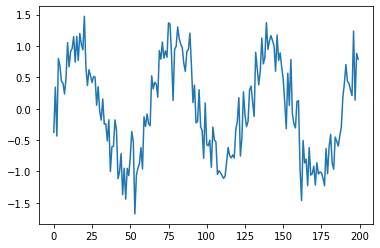

In [8]:
plt.plot(series)
plt.show()

In [0]:
# previous timesteps = T
T = 10
X = []
y = []

for t in range (len (series) - T) :
  y.append (series[t + T])
  X.append (series[t:t+T])

In [10]:
X = np.asarray (X).reshape (-1, T, 1)
y = np.asarray (y)
N = len (X)

cot = np.int (np.floor (N * (3/4)))
cot

142

In [0]:
X_train = X[:cot]
X_test = X[cot:]
y_train = y[:cot]
y_test = y[cot:]

In [12]:
X.shape, y.shape

((190, 10, 1), (190,))

### Model Building

In [0]:
i = Input (shape=(T,1))

x = SimpleRNN (10, activation='tanh') (i)
x = Dense (1)(x)

In [0]:
model = Model (i, x)

In [0]:
adam = tf.keras.optimizers.Adam (learning_rate=0.1, decay=5e-5)

In [0]:
model.compile (optimizer=adam,
                    loss='mse')

In [0]:
epochs = 100

In [0]:
r = model.fit (X_train, y_train, epochs=epochs, verbose=False, validation_data=(X_test, y_test))

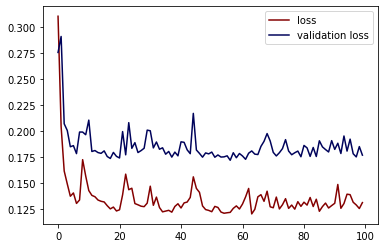

In [19]:
plt.plot (r.history['loss'], label='loss', color='#840000')
plt.plot (r.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

### Forecasting

In [0]:
array = X_test[-1:]

In [0]:
y_hats = []
for c in range (200):
  y_hat = model.predict(array)[0,0]
  y_hats.append (y_hat)
  sliced = array.reshape (1,10).tolist()[0][1:]
  sliced.append (y_hat)
  array = np.asarray (sliced).reshape (-1,10,1)

In [54]:
y_hats

[0.75294507,
 0.7515149,
 0.75033486,
 0.7493614,
 0.7485584,
 0.7478961,
 0.7473496,
 0.7468989,
 0.7465267,
 0.7462201,
 0.7459668,
 0.74575794,
 0.7455857,
 0.7454437,
 0.7453265,
 0.74522984,
 0.74514997,
 0.74508405,
 0.7450298,
 0.744985,
 0.74494815,
 0.74491763,
 0.7448925,
 0.74487174,
 0.74485457,
 0.7448405,
 0.7448288,
 0.7448193,
 0.7448114,
 0.74480486,
 0.7447995,
 0.7447951,
 0.74479127,
 0.7447883,
 0.7447858,
 0.74478376,
 0.7447821,
 0.7447808,
 0.7447796,
 0.74477875,
 0.7447779,
 0.7447772,
 0.7447766,
 0.7447761,
 0.7447758,
 0.74477553,
 0.7447753,
 0.7447752,
 0.74477494,
 0.7447748,
 0.7447746,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.74477446,
 0.744774